<a href="https://colab.research.google.com/github/kazivana/FoodSecurity/blob/main/Malawi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malawi - Food Security Profile

## Ranked last by the Global Food Security Index for Affordability

#### Affordability: Measures the ability of consumers to purchase food, their vulnerability to price shocks and the presence of programmes and policies to support customers when shocks occur.

# Q's:
1.   What do people in Malawi mostly eat?
2.   where do they get it from?

# Installation

In [ ]:
#@title Import packages

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
from palettable.cmocean.sequential import Haline_3

## Load csv files

In [ ]:
#@title Mount google drive in order to import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change this to point to your copy of the csv files
kcal_csv_path = '/content/drive/MyDrive/Big_Terra/Malawi_11.05/FAOSTAT_Malawi_kcal.csv'

# Change this to point to your copy of the csv files
cereals_imports_csv_path = '/content/drive/MyDrive/Big_Terra/Malawi_11.05/FAOSTAT_Malawi_cereals_imports.csv'

# Change this to point to your copy of the csv files
import_vs_domestic_csv_path = '/content/drive/MyDrive/Big_Terra/Malawi_11.05/FAOSTAT_Malawi_cereals_Import_v_Domestic.csv'

# Change this to point to your copy of the csv files
trade_csv_path = '/content/drive/MyDrive/Big_Terra/Malawi_11.05/Trade_Map_Malawi_wheat.csv'

In [ ]:
# Load the kcal/person with food types dataframe
kcal_relevant_columns = ['Item', 'Year', 'Value']
kcal_df = pd.read_csv(kcal_csv_path, usecols=kcal_relevant_columns)

# Load the cereal imports dataframe
import_relevant_columns = ['Element', 'Item', 'Year', 'Value']
cereals_imports_df = pd.read_csv(cereals_imports_csv_path, usecols=import_relevant_columns)

# Load the imported vs domestic supply of cereals dataframe
import_vs_domestic_df = pd.read_csv(import_vs_domestic_csv_path)

# Load the trade share of imports in five countries dataframe
trade_df = pd.read_csv(trade_csv_path)


# Findings

## What do people in Malawi eat?

### Data cleanup

In [ ]:
# Pivot to a wide table
kcal_df = kcal_df.pivot_table(index="Year", columns = "Item", values="Value", aggfunc='sum')

# Remove empty data
kcal_df = kcal_df.dropna(axis=1, how='any')

In [ ]:
#@title Define cereal and non cereal colums
cereal_columns = [
    'Barley and products',
    'Cereals, Other',
    'Maize and products',
    'Millet and products',
    'Oats',
    'Rice and products',
    'Rye and products',
    'Sorghum and products',
    'Wheat and products',
    ]
non_cereal_columns = [
    'Apples and products',
    'Aquatic Animals, Others',
    'Aquatic Plants',
    'Bananas',
    'Beans',
    'Beer',
    'Beverages, Alcoholic',
    'Beverages, Fermented',
    'Bovine Meat',
    'Butter, Ghee',
    'Cassava and products',
    'Cephalopods',
    'Citrus, Other',
    'Cloves',
    'Cocoa Beans and products',
    'Coconut Oil',
    'Coconuts - Incl Copra',
    'Coffee and products',
    'Cottonseed Oil',
    'Cream',
    'Crustaceans',
    'Dates',
    'Demersal Fish',
    'Eggs',
    'Fats, Animals, Raw',
    'Fish, Body Oil',
    'Fish, Liver Oil',
    'Freshwater Fish',
    'Fruits, other',
    'Grapefruit and products',
    'Grapes and products (excl wine)',
    'Groundnut Oil',
    'Groundnuts',
    'Honey',
    'Infant food',
    'Lemons, Limes and products',
    'Maize Germ Oil',
    'Marine Fish, Other',
    'Meat, Other',
    'Milk - Excluding Butter',
    'Miscellaneous',
    'Molluscs, Other',
    'Mutton & Goat Meat',
    'Nuts and products',
    'Offals, Edible',
    'Oilcrops Oil, Other',
    'Oilcrops, Other',
    'Olive Oil',
    'Olives (including preserved)',
    'Onions',
    'Oranges, Mandarines',
    'Palm Oil',
    'Palmkernel Oil',
    'Peas',
    'Pelagic Fish',
    'Pepper',
    'Pigmeat',
    'Pimento',
    'Pineapples and products',
    'Plantains',
    'Potatoes and products',
    'Poultry Meat',
    'Olive Oil',
    'Pulses, Other and products',
    'Rape and Mustard Oil',
    'Rape and Mustardseed',
    'Roots, Other',
    'Sesame seed',
    'Soyabean Oil',
    'Soyabeans',
    'Spices, Other',
    'Sugar (Raw Equivalent)',
    'Sunflowerseed Oil',
    'Sweet potatoes',
    'Sweeteners, Other',
    'Tea (including mate)',
    'Tomatoes and products',
    'Vegetables, other',
    'Wine',
    ]

In [ ]:
# create Sum columns for Cereals and Other

kcal_df['cereals_sum'] = kcal_df[cereal_columns].sum(axis=1)
kcal_df['non_cereal_sum'] = kcal_df[non_cereal_columns].sum(axis=1)
kcal_df.head()

Item,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic","Beverages, Fermented",Bovine Meat,...,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Wine,cereals_sum,non_cereal_sum
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,41.0,2.0,49.0,2.0,3.0,17.0,12.0,...,7.0,0.0,1.0,0.0,4.0,11.0,88.0,0.0,1494.0,1079.0
2011,0.0,0.0,0.0,39.0,1.0,49.0,2.0,3.0,17.0,12.0,...,8.0,0.0,0.0,0.0,4.0,10.0,74.0,0.0,1511.0,1072.0
2012,0.0,0.0,0.0,37.0,1.0,48.0,2.0,4.0,16.0,12.0,...,7.0,0.0,0.0,0.0,1.0,10.0,69.0,0.0,1542.0,1069.0
2013,0.0,0.0,0.0,37.0,1.0,49.0,2.0,4.0,16.0,10.0,...,8.0,0.0,0.0,0.0,8.0,11.0,92.0,0.0,1459.0,1152.0
2014,0.0,0.0,0.0,36.0,1.0,50.0,2.0,2.0,18.0,13.0,...,8.0,101.0,0.0,0.0,16.0,14.0,63.0,0.0,1343.0,1220.0


### Visualisation 1:
#### Share of daily kcal/person from cereal crops

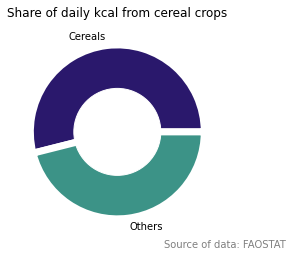

In [ ]:
# Define values and labels
values = [kcal_df['cereals_sum'].sum(), kcal_df['non_cereal_sum'].sum()]
labels = ['Cereals', 'Others']

# Add data source credit
plt.figtext(
    0.62,
    0.1,
    'Source of data: FAOSTAT',
    fontsize=10,
    color='gray',
    )

# Add title
plt.title('Share of daily kcal from cereal crops')

# Adjust plot size
plt.rcParams['figure.figsize'] = [20, 10]

# Add circle in the center to transform it into a doghnut chart
my_circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Create and show a pieplot
plt.pie(values, labels=labels, wedgeprops={'linewidth': 7,
        'edgecolor': 'white'}, colors=Haline_3.hex_colors)
plt.show()

### Visualisation 2:
#### Share of daily kcal/person from each major cereal crop

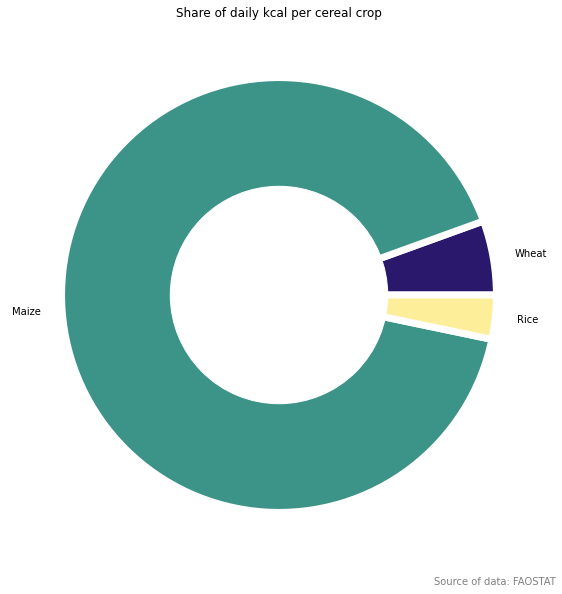

In [ ]:
# Define values and labels
values = [kcal_df['Wheat and products'].sum(),
          kcal_df['Maize and products'].sum(),
          kcal_df['Rice and products'].sum()]
labels = ['Wheat', 'Maize', 'Rice']

# Add data source credit
plt.figtext(0.62, 0.1, 'Source of data: FAOSTAT', fontsize=10,
            color='gray')

# Add title
plt.title('Share of daily kcal per cereal crop')

# Adjust plot size
plt.rcParams['figure.figsize'] = [20, 10]

# Add a circle at the center to transform it in a donut chart
middle_circle = plt.Circle((0, 0), 0.5, color='white')
current_figure = plt.gcf()
current_figure.gca().add_artist(middle_circle)

# Create and show a pieplot
plt.pie(values, labels=labels, wedgeprops={'linewidth': 7,
        'edgecolor': 'white'}, colors=Haline_3.hex_colors)
plt.show()

In [ ]:
kcal_df['Maize and products'].sum()

12462.0

In [ ]:
kcal_df['Wheat and products'].sum()

755.0

In [ ]:
kcal_df['Rice and products'].sum()

447.0

## The state of Malawi's cereal imports

### Data cleanup

In [ ]:
# Only keep quantities in tonnes and not the dollar value
imports_df = cereals_imports_df[cereals_imports_df.Element != "Import Value"]

# pivot to wide table
imports_df = imports_df.pivot_table(index="Year", columns = "Item", values="Value", aggfunc='sum')

# Add Year as a separate column
imports_df["Year"] = imports_df.index

# Shortening timespand to most recent 10 years
imports_df = imports_df[imports_df.Year >= 2010]

In [ ]:
#@title Define wheat, maize and rice columns

# define wheat columns
wheat_columns = ['Wheat',
                 'Flour, wheat']

# define maize columns
maize_columns = ['Flour, maize',
                 'Maize']

# define rice columns
rice_columns = ['Rice, broken',
                'Rice, husked',
                'Rice, milled',
                'Rice, paddy',
                'Rice, paddy (rice milled equivalent)']

In [ ]:
# Create sum columns for Wheat, Maize and Rice
imports_df['wheat_sum'] = imports_df[wheat_columns].sum(axis=1)
imports_df['maize_sum'] = imports_df[maize_columns].sum(axis=1)
imports_df['rice_sum'] = imports_df[rice_columns].sum(axis=1)

In [ ]:
# Drop all other columns
imports_df = imports_df.drop(imports_df.columns[0:17], axis = 1)
imports_df

Item,Year,wheat_sum,maize_sum,rice_sum
Year,,,,
2010,2010,181214.0,15444.0,1514.0
2011,2011,162418.0,6116.0,641.0
2012,2012,151046.0,12.0,7122.0
2013,2013,192858.0,60700.0,1957.0
2014,2014,162803.0,32290.0,644.0
2015,2015,227039.0,105110.0,1456.0
2016,2016,150408.0,326964.0,17719.0
2017,2017,183960.0,46308.0,2048.0
2018,2018,143406.0,6465.0,7441.0


### Visualisation 3:
#### Malawi's cereal crop imports

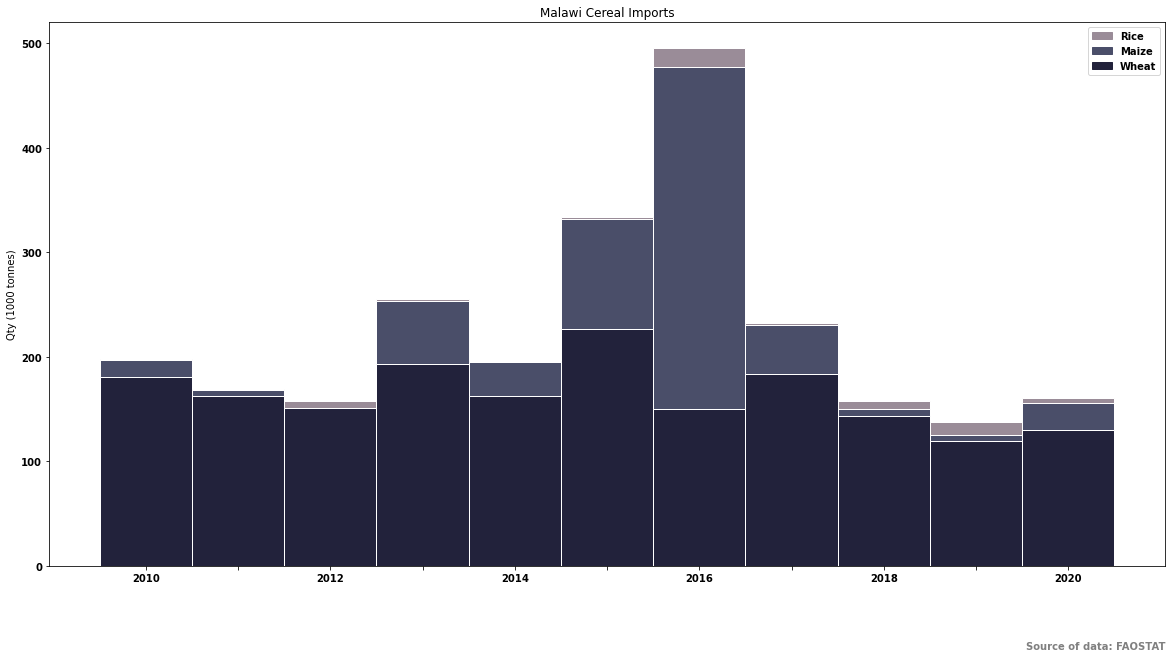

In [ ]:
# y-axis in bold
rc('font', weight='bold')

# Values of each group
bars1 = imports_df["wheat_sum"]/1000
bars2 = imports_df["maize_sum"]/1000
bars3 = imports_df["rice_sum"]/1000

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = imports_df["Year"]

# Names of group and bar width
names = ['2010','','2012','','2014','','2016', '','2018', '', '2020']
barWidth = 1

# Create dark blue bars
plt.bar(r, bars1, color='#22223b', edgecolor='white', width=barWidth)
# Create blue gray bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#4a4e69', edgecolor='white', width=barWidth)
# Create dark gray bars (top)
plt.bar(r, bars3, bottom=bars, color='#9a8c98', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.ylabel('Qty (1000 tonnes)')
plt.title('Malawi Cereal Imports')

colors = {'Rice':'#9a8c98','Maize':'#4a4e69','Wheat':'#22223b'}
labels = ["Rice", "Maize", "Wheat"]
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# Add data source credit
plt.figtext(0.9, 0.01,
            "Source of data: FAOSTAT",
            ha="right",
            fontsize=10,
            color='gray')

# Adjust size
plt.rcParams["figure.figsize"] = [20,10]

# Show graphic
plt.show()

## Domestic vs Imported Supply of Wheat
### Wheat has the highest share of imports

### Data cleanup

In [ ]:
# Separating wheat for visualisation
wheat_supply_df = import_vs_domestic_df[import_vs_domestic_df.Item == "Wheat and products"]

# Pivot to wide table
wheat_supply_df = wheat_supply_df.pivot(index="Year", columns="Element", values="Value")

# Add Year as a column
wheat_supply_df["Year"] = wheat_supply_df.index
wheat_supply_df.head()

Element,Domestic supply quantity,Import Quantity,Year
Year,,,
2010,170,185,2010
2011,148,164,2011
2012,142,152,2012
2013,194,194,2013
2014,136,165,2014


### Visualisation 4
#### Share of wheat imported vs supplied domestically

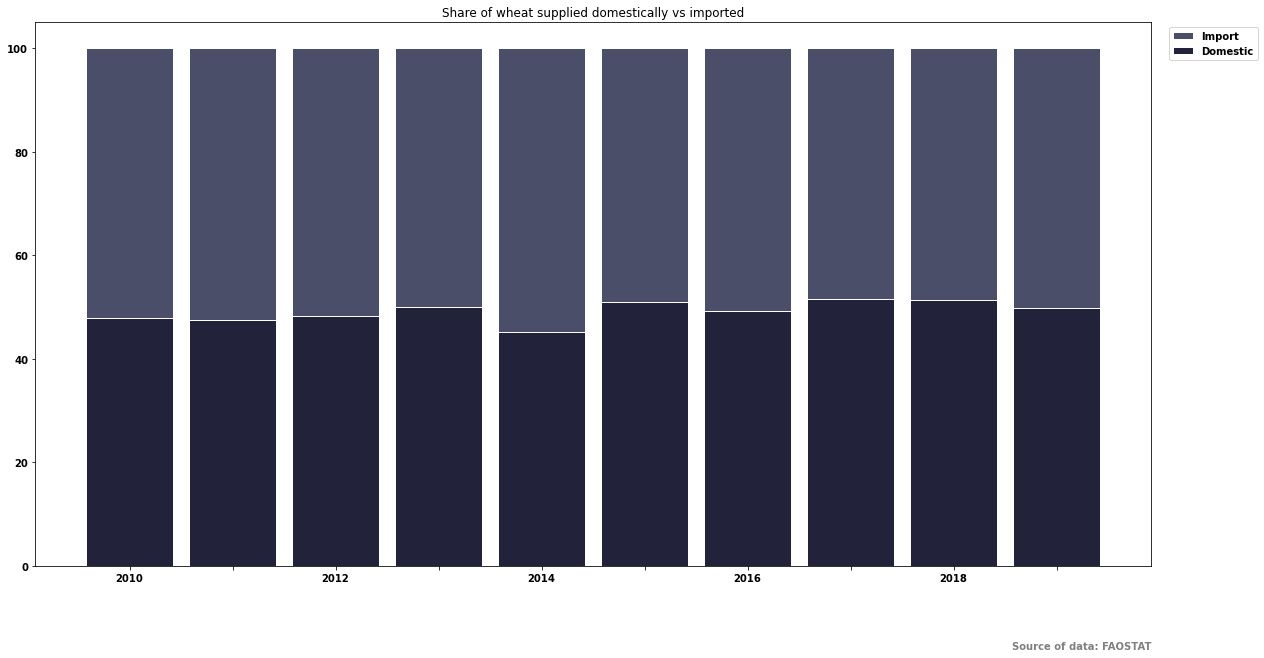

In [ ]:
# Data
years = wheat_supply_df['Year']
raw_data = {'domesticBars': wheat_supply_df['Domestic supply quantity'], 'importBars': wheat_supply_df['Import Quantity']}
wheat = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(wheat['domesticBars'], wheat['importBars'])]
domesticBars = [i / j * 100 for i,j in zip(wheat['domesticBars'], totals)]
importBars = [i / j * 100 for i,j in zip(wheat['importBars'], totals)]

# Plot
barWidth = 0.85
names = ('2010','','2012','','2014','','2016', '','2018', '', '2020')

# Create import Bars
plt.bar(years, importBars, bottom=domesticBars, color='#4a4e69', edgecolor='white', width=barWidth, label='Import')
# Create domestic Bars
plt.bar(years, domesticBars, color='#22223b', edgecolor='white', width=barWidth, label='Domestic')

# Custom x axis
plt.xticks(years, names)

# Add title
plt.title('Share of wheat supplied domestically vs imported')

# Add data source credit
plt.figtext(0.9, 0.01,
            "Source of data: FAOSTAT",
            ha="right",
            fontsize=10,
            color='gray')

plt.legend(bbox_to_anchor=(1.1, 1))

# Adjust size
plt.rcParams["figure.figsize"] = [20,10]

# Show graphic
plt.show()

## Where does Malawi import its wheat from?

### Data cleanup

In [ ]:
# Cutting down to the most relevant rows
trade_df = trade_df[9:25]

# Making the first row into the columns
trade_df.columns = trade_df.iloc[0]
trade_df = trade_df[1:]

# Removing the World/Sum row
trade_df = trade_df.drop(10)

# Fixing the name of the Country name column
trade_df.columns = trade_df.columns.fillna("Country")


In [ ]:
# Quantity is exressed as string, change to integer
trade_df['Quantity imported in 2020'] = trade_df['Quantity imported in 2020'].astype(int)

# Remove the last two rows because their values are 0
trade_df=trade_df.drop(trade_df.index[12:14])

# Keep only relevant columns
trade_df = trade_df[["Country", "Share in Malawi's imports (%)", "Quantity imported in 2020"]].copy()

In [ ]:
trade_df = trade_df.rename(columns = {"Share in Malawi's imports (%)":'Percentage'})

### Visualisation
#### Share of wheat imports per country


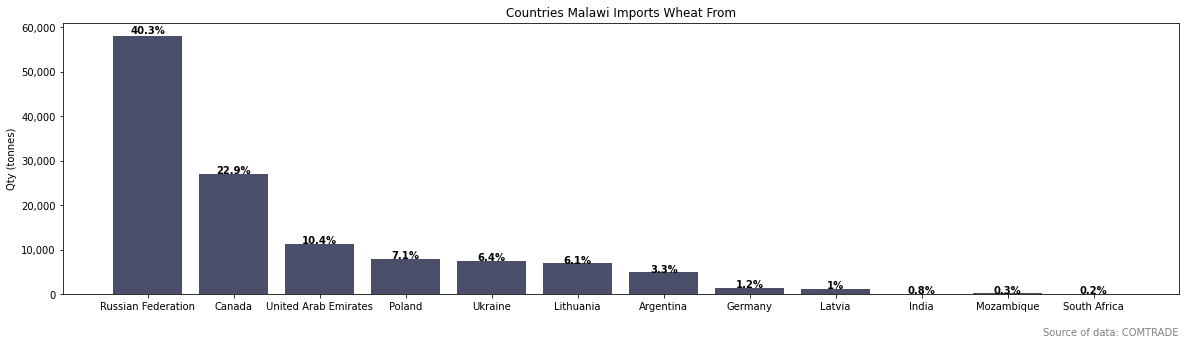

In [ ]:
# Data
height = trade_df["Quantity imported in 2020"]
bars = trade_df['Country']
y_pos = np.arange(len(bars))


# Create bars
bar1=plt.bar(y_pos, height, color = '#4a4e69')


# Text showing % above each bar
i = 11
for p in bar1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(trade_df.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1


# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add commas and label to y-axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.ylabel("Qty (tonnes)")

# add title
plt.title('Countries Malawi Imports Wheat From')

# add data source credit
plt.figtext(0.9, 0.01, "Source of data: COMTRADE",
            ha="right",
            fontsize=10,
            color='gray')

plt.rcParams["figure.figsize"] = (20,5)

# Show graphic
plt.show()